### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [8]:
df.drop('Address', axis=1, inplace=True)
# Eliminamos la columna 'Address'

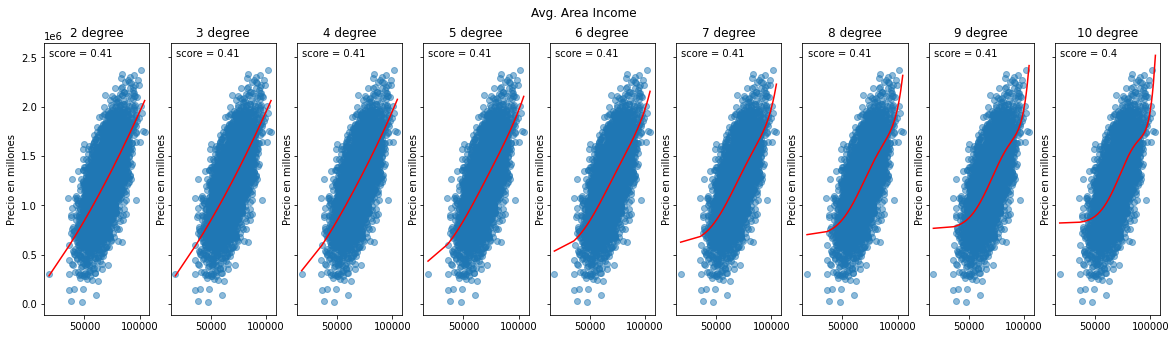

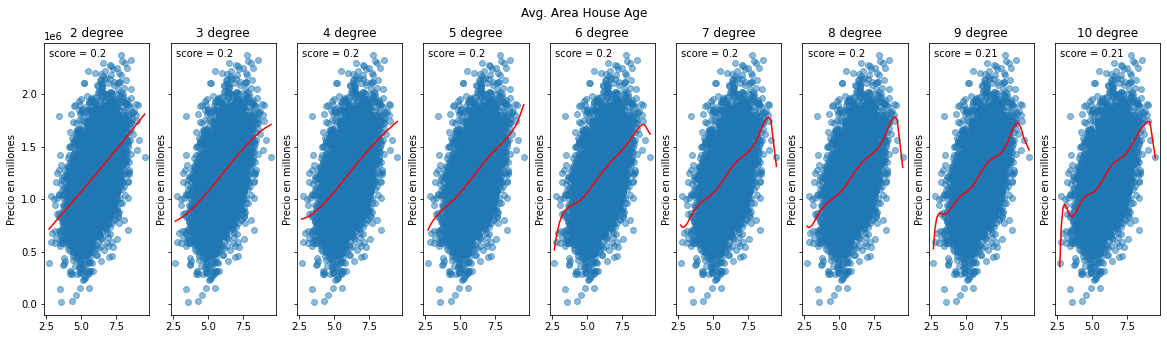

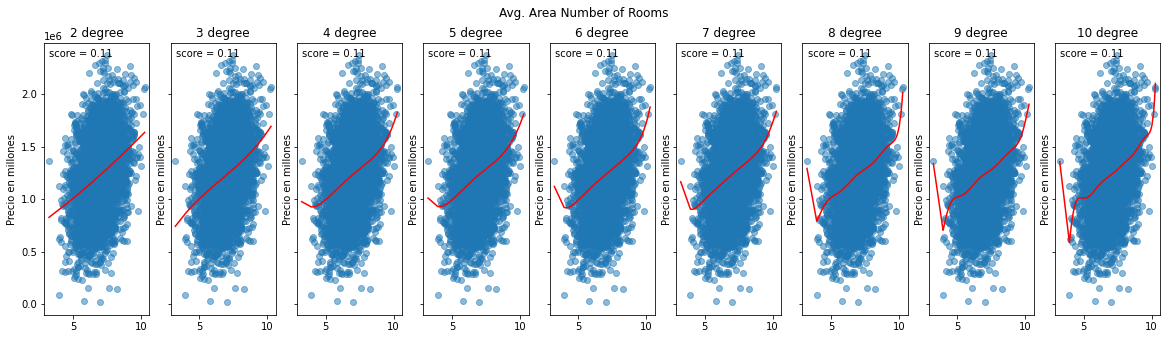

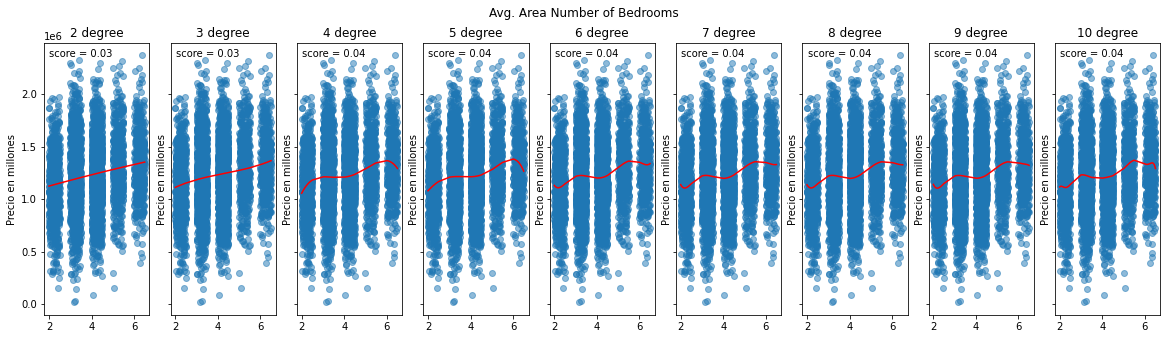

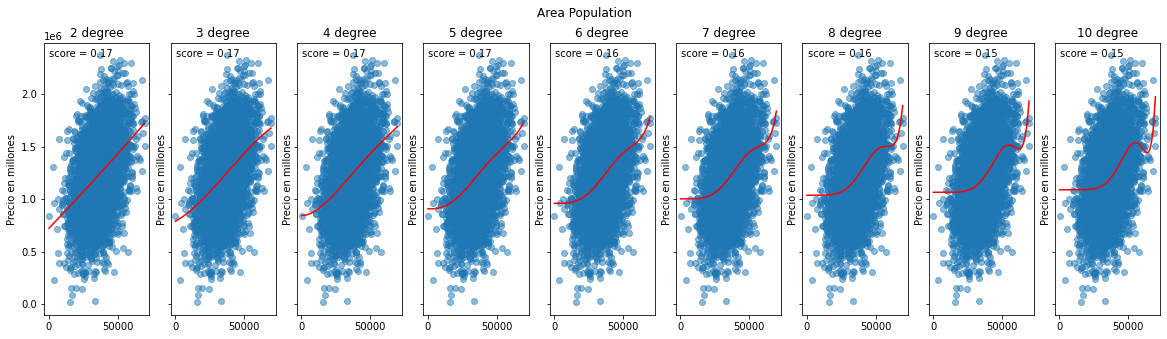

In [9]:
seed = 42
# Hacemos un gráfico por columna y grado del polinomio
for i in range(len(df.columns) - 1):
    fig, ax = plt.subplots(ncols=9, figsize=(20, 5), sharey=True)
    fig.suptitle(f'{df.columns[i]}')
    X_train, X_test, y_train, y_test = train_test_split(df[df.columns[i]].values.reshape(-1, 1), df['Price'], test_size=0.2,random_state=seed)

    for k in range(2, 11):
        model = LinearRegression()
        poly_transform = PolynomialFeatures(degree=k)
        X_poly = poly_transform.fit_transform(X_train, y_train)
        model.fit(X_poly, y_train)
        X_train_show, y_train_show = zip(*(sorted(zip(X_train, model.predict(X_poly)))))
        ax[k - 2].scatter(X_train, y_train, alpha=0.5)
        ax[k - 2].plot(X_train_show, y_train_show, c='red')
        ax[k - 2].set_title(f'{k} degree')
        ax[k - 2].set_ylabel(f'Precio en millones')
        ax[k - 2].annotate(f'score = {round(model.score(X_poly, y_train), 2)}', xy=(0.05, 0.95), xycoords='axes fraction')
        

Vemos que la mayoría de las veces el score no aumenta a partir del grado 2, o tiene una subida insignificante 